In [143]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from QMIS_code.Quantum_MIS import Quantum_MIS
from QMIS_code.pulse_utils import Pulse_constructor
from pulser.devices import AnalogDevice

## Creation du graphe

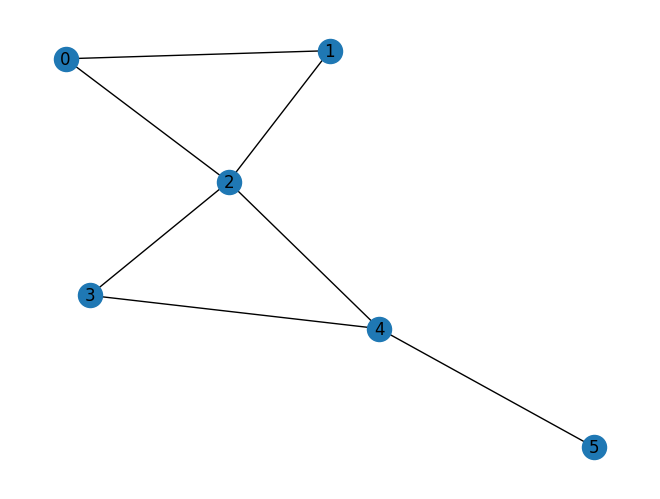

In [144]:
G = nx.Graph()

edges = np.array([("4","5"),("4","3"),("4","2"),("3","2"),("2","1"),("1","0"),("0","2")])
G.add_edges_from(edges)

#setting the position of the nodes using spring_layout
pos = nx.spring_layout(G, seed = 42)#the seed can be changed, but the seed 42 is used by the Quantum_MIS class

#plot the graph
nx.draw(G, pos = pos, with_labels = True)
plt.show()

### Creating a function to determine the percentage of good results

In [145]:
def good_ratio(counts:dict,nb_shots:int):
    good_results=["010101","100101"]
    num_good=0
    for key,value in counts.items():
        if key in good_results:
            num_good+=value
    return num_good/nb_shots

## Test des pulses

### Creation de l'objet

In [146]:
qmis_runner=Quantum_MIS(G,device=AnalogDevice)
counts_list=[]
ratios={}
nb_shots=100

### Waveform

In [147]:
count=qmis_runner.run(Pulse_constructor(4000,"Waveform"),shots=nb_shots)
counts_list.append(count)
ratios["Waveform"]=good_ratio(count,nb_shots)

10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.07s. Est. time left: 00:00:00:00
30.0%. Run time:   0.11s. Est. time left: 00:00:00:00
40.0%. Run time:   0.15s. Est. time left: 00:00:00:00
50.0%. Run time:   0.19s. Est. time left: 00:00:00:00
60.0%. Run time:   0.22s. Est. time left: 00:00:00:00
70.0%. Run time:   0.26s. Est. time left: 00:00:00:00
80.0%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s


### Rise_fall

In [148]:
count=qmis_runner.run(Pulse_constructor(4000,"Rise_fall"),shots=nb_shots)
counts_list.append(count)
ratios["Rise_fall"]=good_ratio(count,nb_shots)

10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.07s. Est. time left: 00:00:00:00
30.0%. Run time:   0.10s. Est. time left: 00:00:00:00
40.0%. Run time:   0.14s. Est. time left: 00:00:00:00
50.0%. Run time:   0.18s. Est. time left: 00:00:00:00
60.0%. Run time:   0.23s. Est. time left: 00:00:00:00
70.0%. Run time:   0.28s. Est. time left: 00:00:00:00
80.0%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s


### Blackman

In [149]:
count=qmis_runner.run(Pulse_constructor(4000,"Blackman"),shots=nb_shots)
counts_list.append(count)
ratios["Blackman"]=good_ratio(count,nb_shots)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.03s. Est. time left: 00:00:00:00
30.0%. Run time:   0.11s. Est. time left: 00:00:00:00
40.0%. Run time:   0.14s. Est. time left: 00:00:00:00
50.0%. Run time:   0.17s. Est. time left: 00:00:00:00
60.0%. Run time:   0.20s. Est. time left: 00:00:00:00
70.0%. Run time:   0.24s. Est. time left: 00:00:00:00
80.0%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.33s


### Pyramide

In [150]:
count=qmis_runner.run(Pulse_constructor(4000,"Pyramid",T_pyramide=1000),shots=nb_shots)
counts_list.append(count)
ratios["Pyramid"]=good_ratio(count,nb_shots)

10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.08s. Est. time left: 00:00:00:00
30.0%. Run time:   0.11s. Est. time left: 00:00:00:00
40.0%. Run time:   0.15s. Est. time left: 00:00:00:00
50.0%. Run time:   0.19s. Est. time left: 00:00:00:00
60.0%. Run time:   0.22s. Est. time left: 00:00:00:00
70.0%. Run time:   0.26s. Est. time left: 00:00:00:00
80.0%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s


### Rise_sweep_fall

In [151]:
count=qmis_runner.run(Pulse_constructor(4000,"Rise_sweep_fall"),shots=nb_shots)
counts_list.append(count)
ratios["Rise_sweep_fall"]=good_ratio(count,nb_shots)

10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.07s. Est. time left: 00:00:00:00
30.0%. Run time:   0.10s. Est. time left: 00:00:00:00
40.0%. Run time:   0.13s. Est. time left: 00:00:00:00
50.0%. Run time:   0.17s. Est. time left: 00:00:00:00
60.0%. Run time:   0.20s. Est. time left: 00:00:00:00
70.0%. Run time:   0.24s. Est. time left: 00:00:00:00
80.0%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.35s


## Result histogram

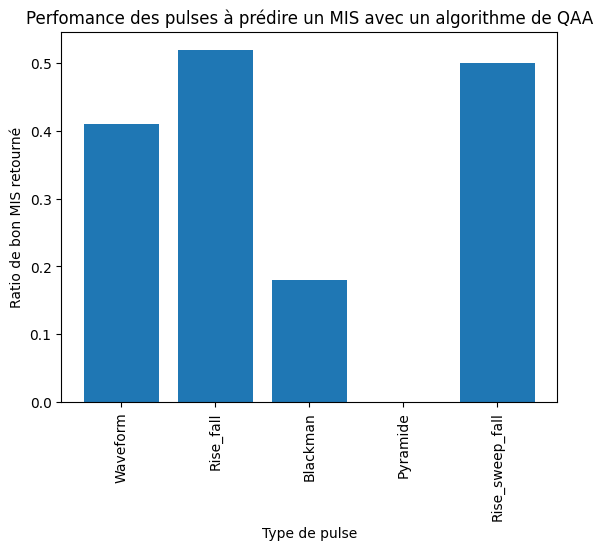

In [152]:
plt.bar(ratios.keys(), ratios.values())
plt.xticks(rotation="vertical")
plt.ylabel("Ratio de bon MIS retourné")
plt.xlabel("Type de pulse")
plt.title("Perfomance des pulses à prédire un MIS avec un algorithme de QAA")
plt.show()